# Modelo de Regresión lineal


**Formula Regresión lineal**: $$ y = a + b * x $$

Datos simulados:
* X: 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [2]:
import pandas as pd
import numpy as np

In [3]:
n = 100
seed = 2022

In [4]:
np.random.seed(seed)
x = 1.5 + 2.5 * np.random.randn(n)
res = 0 + 0.8 * np.random.randn(n)
y_pred = 5 + 1.9 * x
y_act = 5 + 1.9 * x + res

In [5]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [6]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y": y_act_list,
        "y_pred": y_pred_list
    }
)

In [7]:
data.head()

,x,y,y_pred
0,1.498680,7.617975,7.847492
1,0.812746,5.231279,6.544218
2,1.151786,5.576800,7.188394
3,6.461715,16.972716,17.277259
4,2.205273,9.862580,9.190019


In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor actual vs valor predicción')

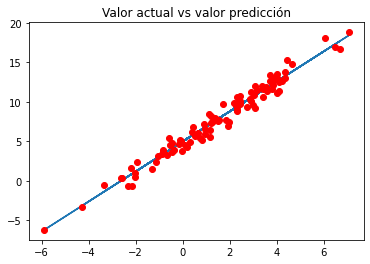

In [9]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.title("Valor actual vs valor predicción")

## Añado la media al gráfico para calcular SSR, SSD y SST

In [10]:
y_mean = [np.mean(y_act) for i in range (1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs valor predicción')

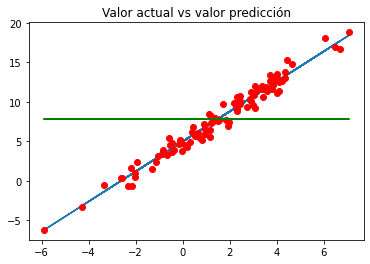

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs valor predicción")

## Calculamos valores

In [12]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_pred"]-data["y"])**2
data["SST"] = (data["y"]-np.mean(y_act))**2

In [13]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,1.498680,7.617975,7.847492,0.000818,0.052678,0.040368
1,0.812746,5.231279,6.544218,1.624794,1.723810,6.695744
2,1.151786,5.576800,7.188394,0.397529,2.597233,5.026977
3,6.461715,16.972716,17.277259,89.460706,0.092746,83.792496
4,2.205273,9.862580,9.190019,1.879989,0.452337,4.176658


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])
R2 = SSR/SST

In [15]:
R2

0.9464679547716774

> NOTE: el valor es 0.94, es muy buen valor ya que hemos creado los valores de forma artificial

In [17]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8023183632725057

In [18]:
RSE / np.mean(data["y"])

0.10261279174276836

> NOTE: 10% de error